dataset - https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format/data

reference code - https://www.kaggle.com/code/mahmutyldrmm/a-z-handwritting-alphabets-project

# Imports

In [11]:
%pip install tqdm
%pip install torch
%pip install pandas
%pip install pyyaml
%pip install seaborn
%pip install matplotlib
%pip install tensorflow
%pip install opencv-python
%pip install scikit-learn
%pip install git+https://github.com/KindXiaoming/pykan.git

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/KindXiaoming/pykan.git to c:\users\kshitij\appdata\local\temp\pip-req-build-xt_kewek
  Resolved https://github.com/KindXiaoming/pykan.git to commit ecde4ec3274d3bef1ad737479cf126aed38ab530
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: 

  Running command git clone --filter=blob:none --quiet https://github.com/KindXiaoming/pykan.git 'C:\Users\Kshitij\AppData\Local\Temp\pip-req-build-xt_kewek'


In [12]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import backend as K
import matplotlib.pyplot as plt
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.utils import shuffle
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import optimizers as keras_optimizers
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

sns.set()

# Data Preprocessing

In [13]:
dataset = pd.read_csv("./A_Z Handwritten Data.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

X = dataset.drop('label', axis=1)
y = dataset['label']

In [14]:
print("X shape:",X.shape)
print("number of columns:",len(X.iloc[1]))
print("784= 28*28")

X.head()

X shape: (372450, 784)
number of columns: 784
784= 28*28


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


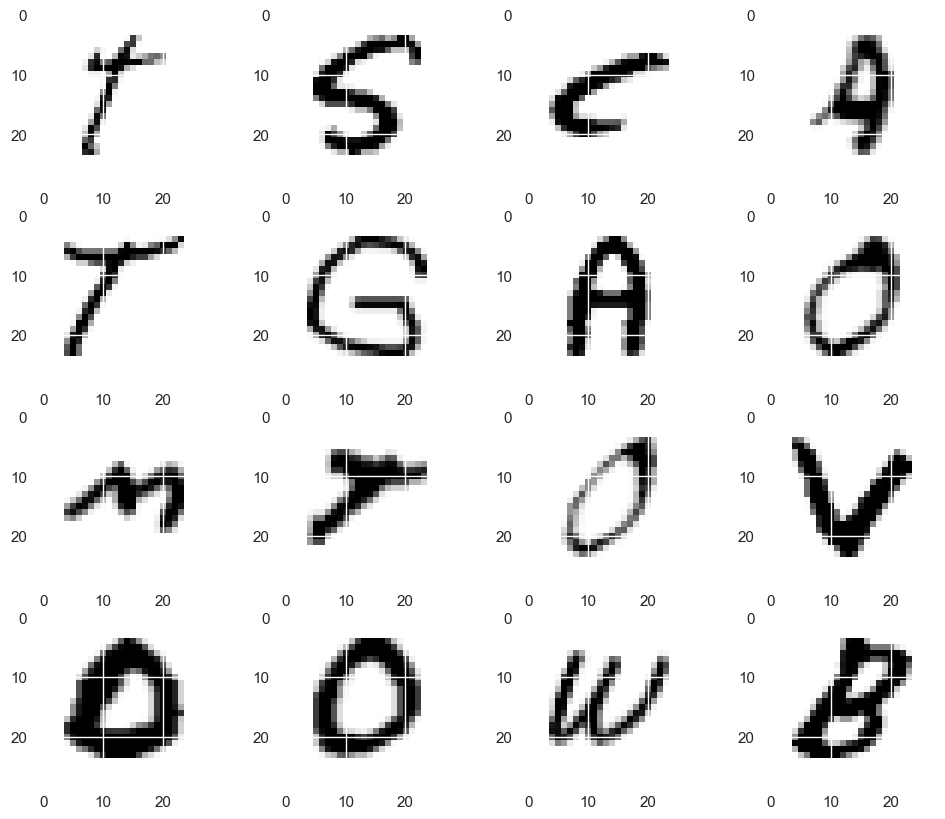

In [15]:
X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, columns = 4, 4
for i in range(16):
    plt.subplot(columns, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),
           interpolation='nearest',
           cmap='Greys')

plt.show()

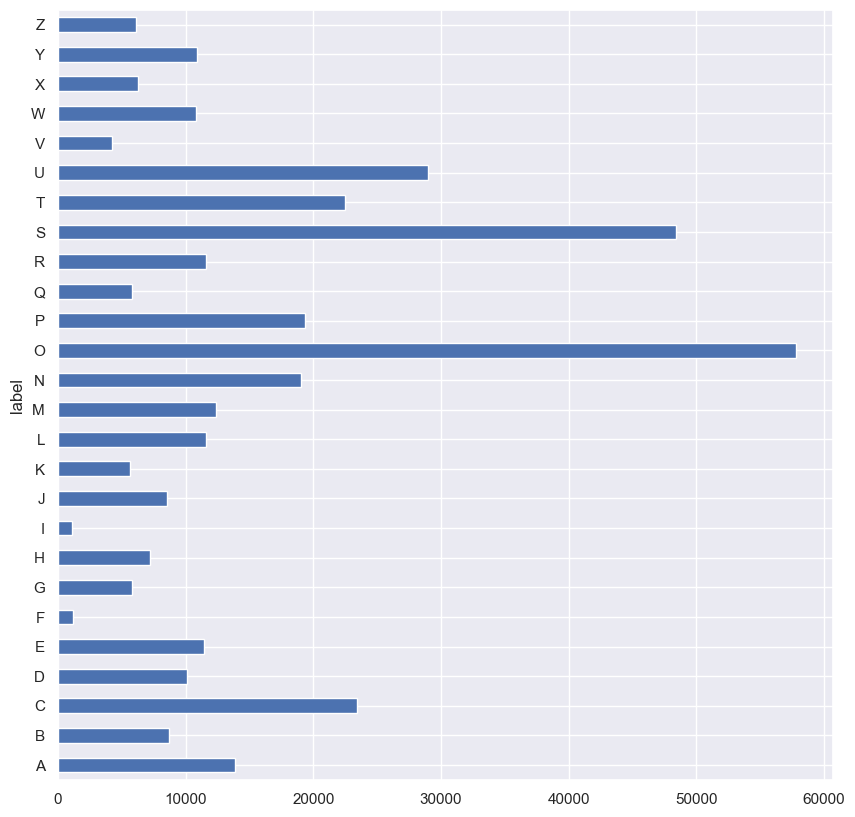

We have very low observations in letters I and F.
Number of I: 1120
Number of F: 1163


In [16]:
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
dataset_alphabets = dataset.copy()
dataset_alphabets['label'] = dataset_alphabets['label'].map(alphabets_mapper)

label_size = dataset_alphabets.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

print("We have very low observations in letters I and F.")
print("Number of I:", label_size['I'])
print("Number of F:", label_size['F'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

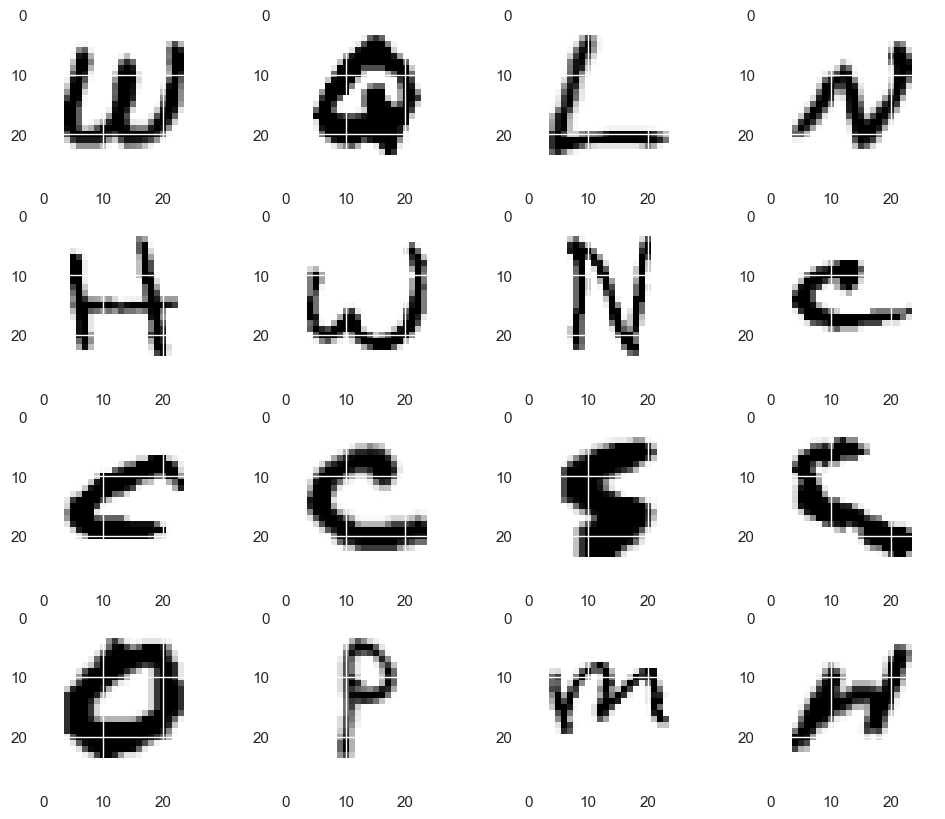

In [18]:
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, columns = 4, 4
for i in range(16):
    plt.subplot(columns, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [19]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(X_train)

# CNN Model

In [20]:
cnn_model = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(26, activation='softmax')
])

cls_deneme = Sequential()
cls_deneme.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
cls_deneme.add(MaxPooling2D(pool_size=(2, 2)))
cls_deneme.add(Dropout(0.5))

cls_deneme.add(Conv2D(128, (3, 3), activation='relu'))
cls_deneme.add(MaxPooling2D(pool_size=(2, 2)))
cls_deneme.add(Dropout(0.3))

cls_deneme.add(Flatten())
cls_deneme.add(Dense(256, activation='relu'))
cls_deneme.add(Dense(len(y.unique()), activation='softmax'));


In [21]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cls_deneme.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
scores = cnn_model.evaluate(X_test,y_test, verbose=0)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-4);

print("CNN Score:",scores[1]);

CNN Score: 0.037320446223020554


In [22]:
history_cnn = cnn_model.fit(datagen.flow(X_train, y_train, batch_size=64),
                            validation_data=(X_test, y_test),
                            epochs=10,
                            callbacks=[early_stopping, reduce_lr],
                            verbose=2)

print("Model Trial 2 training Begins")
history_deneme = cls_deneme.fit(
    datagen.flow(X_train, y_train, batch_size=200),
    validation_data=(X_test, y_test),
    epochs=10,
    callbacks=[early_stopping, reduce_lr],
    verbose=2)



test_loss_cnn, test_acc_cnn = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Basic CNN Test Accuracy: {test_acc_cnn:.3f}")

Epoch 1/10
4656/4656 - 66s - 14ms/step - accuracy: 0.8348 - loss: 0.5550 - val_accuracy: 0.9447 - val_loss: 0.1946 - learning_rate: 0.0010
Epoch 2/10
4656/4656 - 65s - 14ms/step - accuracy: 0.9189 - loss: 0.2733 - val_accuracy: 0.9517 - val_loss: 0.1685 - learning_rate: 0.0010
Epoch 3/10
4656/4656 - 67s - 14ms/step - accuracy: 0.9340 - loss: 0.2231 - val_accuracy: 0.9589 - val_loss: 0.1426 - learning_rate: 0.0010
Epoch 4/10
4656/4656 - 64s - 14ms/step - accuracy: 0.9414 - loss: 0.1973 - val_accuracy: 0.9621 - val_loss: 0.1342 - learning_rate: 0.0010
Epoch 5/10
4656/4656 - 64s - 14ms/step - accuracy: 0.9468 - loss: 0.1811 - val_accuracy: 0.9673 - val_loss: 0.1189 - learning_rate: 0.0010
Epoch 6/10
4656/4656 - 64s - 14ms/step - accuracy: 0.9496 - loss: 0.1717 - val_accuracy: 0.9676 - val_loss: 0.1177 - learning_rate: 0.0010
Epoch 7/10
4656/4656 - 64s - 14ms/step - accuracy: 0.9522 - loss: 0.1627 - val_accuracy: 0.9672 - val_loss: 0.1194 - learning_rate: 0.0010
Epoch 8/10
4656/4656 - 64s 

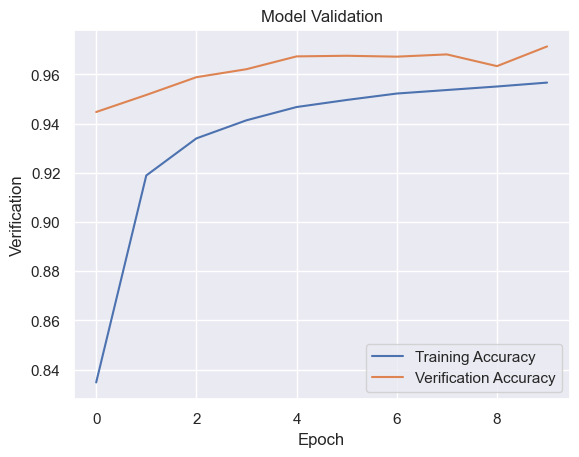

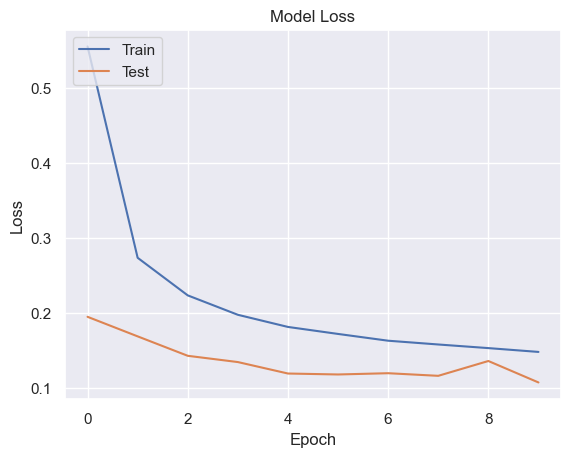

In [23]:
plt.plot(history_cnn.history['accuracy'], label= "Training Accuracy ")
plt.plot(history_cnn.history['val_accuracy'], label= "Verification Accuracy")
plt.title('Model Validation')
plt.ylabel('Verification')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history_cnn.history['loss'], label='Loss of learning rate')
plt.plot(history_cnn.history['val_loss'], label='Verification Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Test loss: 0.107
Test accuracy: 0.971

Model 2 Test Accuracy (cls_deneme): 0.981
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step
\Classification Report:
              precision    recall  f1-score   support

           A       0.97      0.99      0.98      2774
           B       0.94      0.96      0.95      1734
           C       0.98      0.97      0.97      4682
           D       0.94      0.89      0.92      2027
           E       0.97      0.98      0.97      2288
           F       0.96      0.97      0.96       233
           G       0.93      0.97      0.95      1152
           H       0.97      0.95      0.96      1444
           I       0.93      0.98      0.95       224
           J       0.90      0.91      0.90      1699
           K       0.96      0.95      0.96      1121
           L       0.97      0.93      0.95      2317
           M       0.99      0.98      0.99      2467
           N       0.96      0.97      0.97      3802
           O       0.98      0.99      

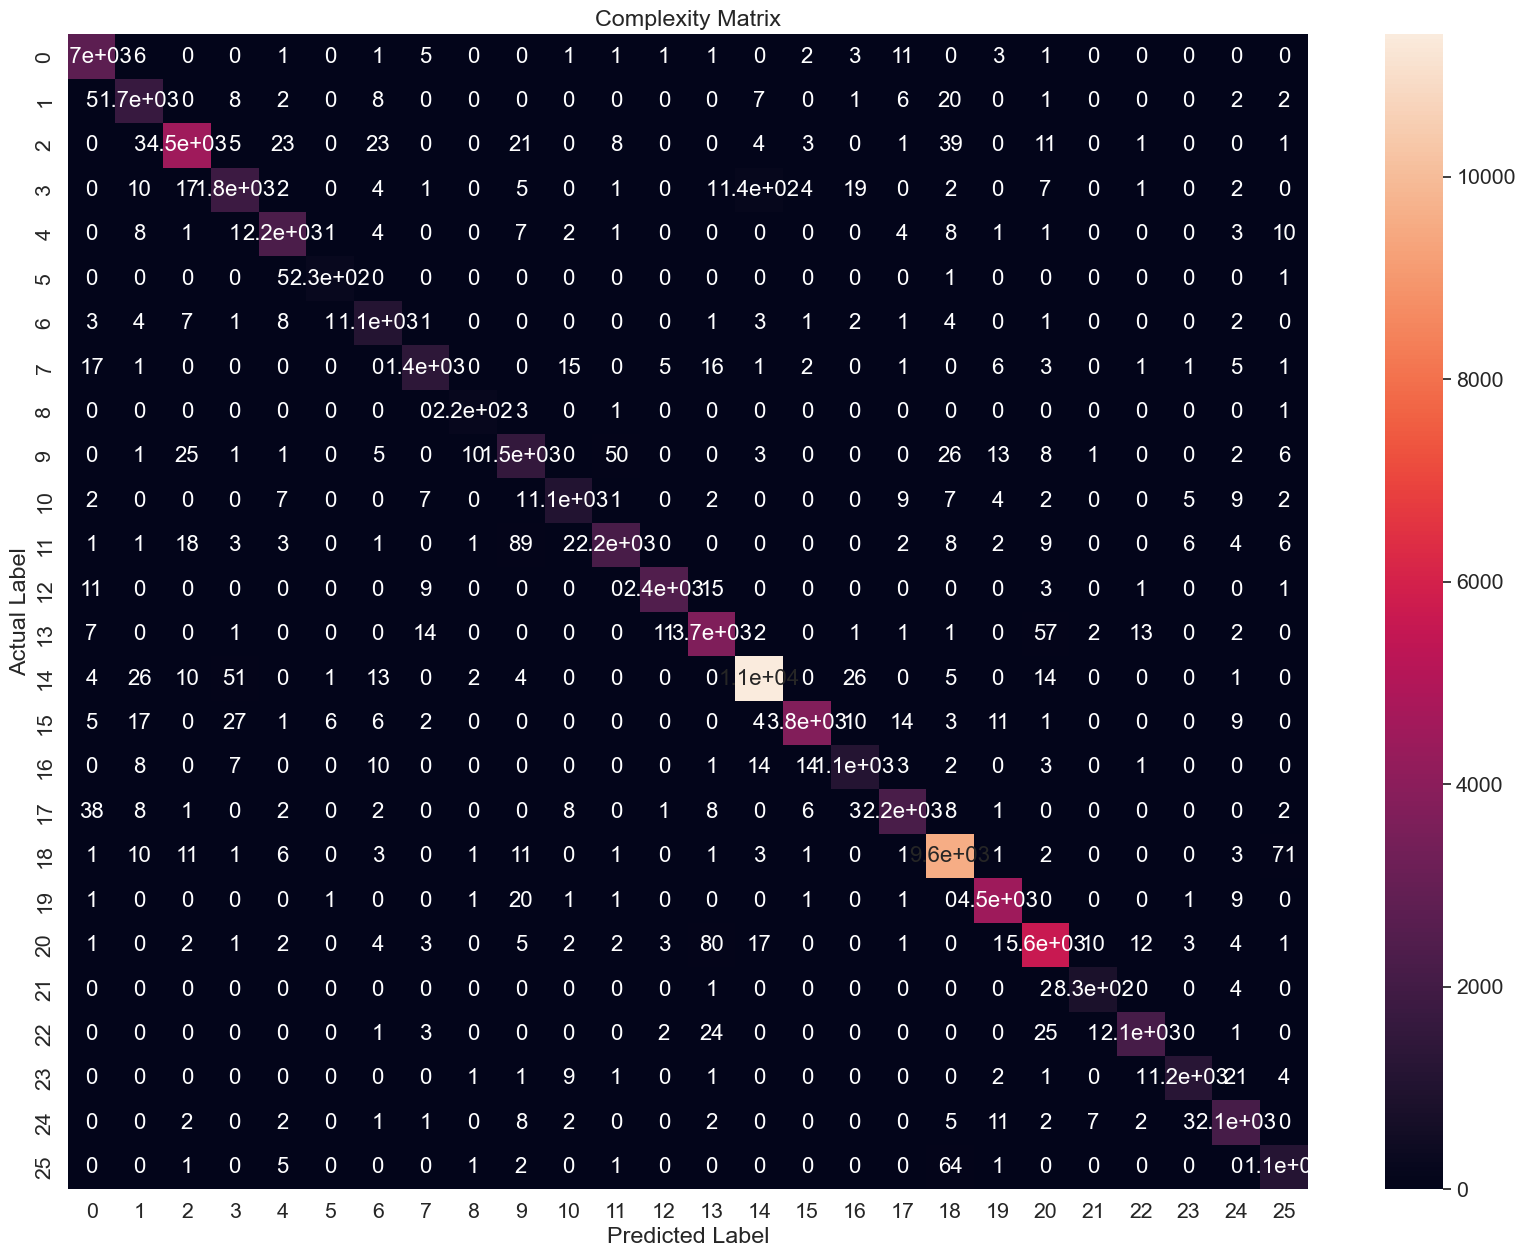

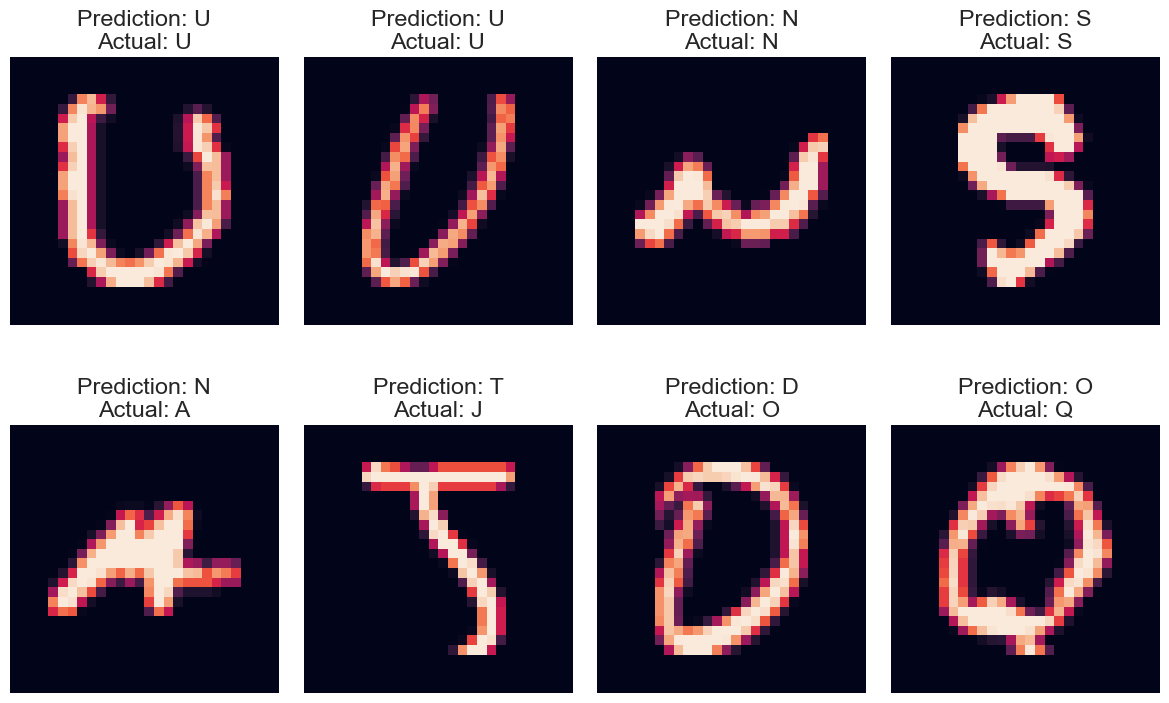

In [24]:
test_loss, test_accuracy= cnn_model.evaluate(X_test, y_test, verbose=0 )
print(f"Test loss: {test_loss:.3f}\nTest accuracy: {test_accuracy:.3f}")

test_loss_deneme, test_accuracy_deneme = cls_deneme.evaluate(X_test, y_test, verbose=0)
print(f"\nModel 2 Test Accuracy (cls_deneme): {test_accuracy_deneme:.3f}")

# Let's make some guesses
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

target_names = ['A','B','C','D','E','F','G','H','I','J',
                'K','L','M','N','O','P','Q','R','S','T',
                'U','V','W','X','Y','Z']

# Classification report
print("\Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names= target_names ))


# Complexity matrix
cm=confusion_matrix(y_test.argmax(axis=1),cnn_model.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(26),
                  range(26))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.title('Complexity Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Let's visualize some examples of correct and incorrect predictions.
correct_indices = np.where(y_pred_classes == y_true)[0]
incorrect_indices = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(12, 8))

# Examples of correct predictions
for i, correct in enumerate(correct_indices[:4]):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_test[correct])
    plt.title(f"Prediction: {target_names[y_pred_classes[correct]]}\nActual: {target_names[y_true[correct]]}")
    plt.axis('off')

for i, incorrect in enumerate(incorrect_indices[:4]):
    plt.subplot(2, 4, i+5)
    plt.imshow(X_test[incorrect])
    plt.title(f"Prediction: {target_names[y_pred_classes[incorrect]]}\nActual: {target_names[y_true[incorrect]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [25]:
import cv2
import numpy as np

def preprocess_image_to_mnist(image_path):
    # 1. Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 2. Invert the colors (from black-on-white to white-on-black)
    #    This assumes your original image is like MNIST (white digit, black bg)
    #    If your image is black digit on white paper, uncomment the next line
    # img = cv2.bitwise_not(img)

    # 3. Resize the image to 28x28
    #    We use INTER_AREA for shrinking, which is generally good.
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

    # 4. Normalize pixel values to the [0, 1] range
    img = img.astype('float32') / 255.0

    # 5. Reshape for a model (e.g., a CNN)
    #    Shape becomes (1, 28, 28, 1)
    img = np.reshape(img, (1, 28, 28, 1))

    return img

# --- How to use it ---
# my_image = preprocess_image_to_mnist('path/to/my_digit_image.png')
# prediction = model.predict(my_image)

In [26]:
img = preprocess_image_to_mnist("/content/o.jpg")
my_pred = cnn_model.predict(img)
my_pred_classes = np.argmax(my_pred, axis=1)
print(f"Predicted class: {alphabets_mapper[my_pred_classes[0]]}, {my_pred_classes}")

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [34]:
# =========================
# 📦 Save & Prepare Downloadable Model Files
# =========================
import os

# Create models directory if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save both CNN models
cnn_model_path = "models/cnn_model.h5"
cls_deneme_path = "models/cls_deneme_model.h5"

cnn_model.save(cnn_model_path)
cls_deneme.save(cls_deneme_path)

print(f"✅ Models saved successfully!")
print(f"📁 CNN model path: {cnn_model_path}")
print(f"📁 CLS_Deneme model path: {cls_deneme_path}")

# Optional: For Jupyter or Streamlit use
try:
    import IPython
    from IPython.display import FileLink
    display(FileLink(cnn_model_path))
    display(FileLink(cls_deneme_path))
except:
    print("You can now manually download from the 'models' folder.")

✅ Models saved successfully!
📁 CNN model path: models/cnn_model.h5
📁 CLS_Deneme model path: models/cls_deneme_model.h5


a:\Major Project\optical-character-recognition-KANs\models\cnn_model.h5

a:\Major Project\optical-character-recognition-KANs\models\cls_deneme_model.h5

# RNN

## RNN OCR (A–Z Dataset) — Keras / TensorFlow

In [30]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, callbacks, optimizers

## Load or prepare your dataset

In [31]:
data = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')
X = data.drop('0', axis=1).values.reshape(-1,28,28,1) / 255.0
y_labels = data['0'].values
y = tf.keras.utils.to_categorical(y_labels, num_classes=26)

# Ensure arrays exist and are correct dtype
X = X.astype('float32')
y = y.astype('float32')

# Convert to (samples, timesteps, features)
X_seq = X.reshape((-1, 28, 28))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.2, random_state=42, shuffle=True)
print("Shapes:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shapes: (297960, 28, 28) (297960, 26) (74490, 28, 28) (74490, 26)


## Define RNN model

In [32]:
def build_rnn_model(time_steps=28, features=28, num_classes=26, rnn_units=128, dropout=0.3):
    inp = layers.Input(shape=(time_steps, features))
    x = layers.Bidirectional(layers.LSTM(rnn_units, return_sequences=True))(inp)
    x = layers.Bidirectional(layers.LSTM(rnn_units // 2))(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(dropout)(x)
    out = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=inp, outputs=out, name="BiLSTM_OCR")
    return model

rnn_model = build_rnn_model()
rnn_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
rnn_model.summary()

Model: "BiLSTM_OCR"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 28, 256)        │       160,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 344,986 (1.32 MB)

 Trainable params: 344,986 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

## Training setup

In [33]:
EPOCHS = 10
BATCH = 128
os.makedirs("models", exist_ok=True)
MODEL_PATH = "models/rnn_ocr_model.keras"

cb = [
    callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    callbacks.ModelCheckpoint(MODEL_PATH, monitor='val_accuracy', save_best_only=True, verbose=1)
]

print("\n🚀 Training started...")
history = rnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH,
    callbacks=cb,
    verbose=1
)


🚀 Training started...
Epoch 1/10
2327/2328 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8004 - loss: 0.7265
Epoch 1: val_accuracy improved from None to 0.96547, saving model to models/rnn_ocr_model.keras
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 118s 47ms/step - accuracy: 0.9051 - loss: 0.3456 - val_accuracy: 0.9655 - val_loss: 0.1223
Epoch 2/10
2327/2328 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9681 - loss: 0.1183
Epoch 2: val_accuracy improved from 0.96547 to 0.98012, saving model to models/rnn_ocr_model.keras
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 103s 44ms/step - accuracy: 0.9709 - loss: 0.1089 - val_accuracy: 0.9801 - val_loss: 0.0731
Epoch 3/10
2327/2328 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9779 - loss: 0.0814
Epoch 3: val_accuracy did not improve from 0.98012
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 113s 48ms/step - accuracy: 0.9787 - loss: 0.0793 - val_accuracy: 0.9794 - val_loss: 0.0733
Epoch 4/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9823 - loss: 0.0636
Epoch 4: 

## Evaluate

In [35]:
loss, acc = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test accuracy: {acc*100:.2f}% — Loss: {loss:.4f}")

# =========================
# Save a downloadable .h5 model file
# =========================
H5_PATH = "models/rnn_ocr_model.h5"
rnn_model.save(H5_PATH)
print(f"📦 Model saved for frontend: {H5_PATH}")



✅ Test accuracy: 99.15% — Loss: 0.0336
📦 Model saved for frontend: models/rnn_ocr_model.h5


## Plot training curves

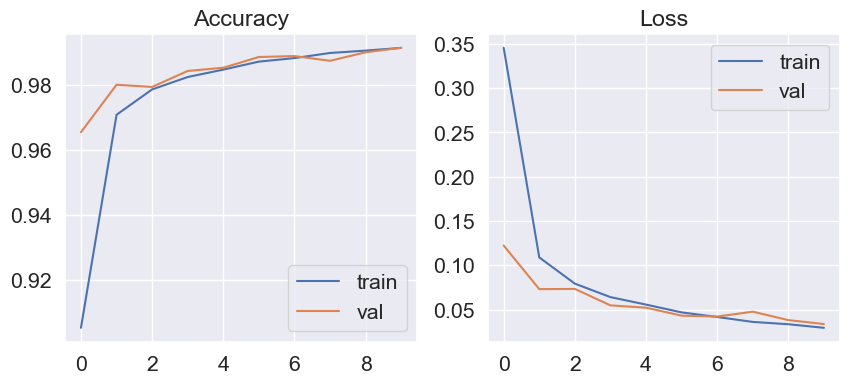

In [36]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Loss')
plt.legend()
plt.show()


## Prediction helper

In [37]:
import cv2
def predict_from_image_rnn(image_path, model=rnn_model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(image_path)
    img = cv2.resize(img, (28,28))
    img = img.astype('float32') / 255.0
    seq = img.reshape(1,28,28)
    pred = model.predict(seq)
    label = np.argmax(pred, axis=1)[0]
    print("Predicted:", chr(label + 65))
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {chr(label+65)}")
    plt.axis('off')
    plt.show()

# Kolmogorov Arnold Netwoks

## KANs Test

In [ ]:
import kan
print(dir(kan))

KeyboardInterrupt: 

In [ ]:
%pip show pykan

Name: pykan
Version: 0.2.8
Summary: Kolmogorov Arnold Networks
Home-page: 
Author: Ziming Liu
Author-email: zmliu@mit.edu
License: 
Location: a:\Major Project\optical-character-recognition-KANs\.venv\Lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [27]:
from kan import KAN
model = KAN(width=[2, 3, 2, 1])

checkpoint directory created: ./model
saving model version 0.0


In [28]:
from kan.utils import create_dataset
f = lambda x: 3*x[:,[0]]**3+2*x[:,[0]]+4 + 2 * x[:,[0]] * x[:,[1]] ** 2 + 3 * x[:,[1]] ** 3
dataset = create_dataset(f, n_var=2)

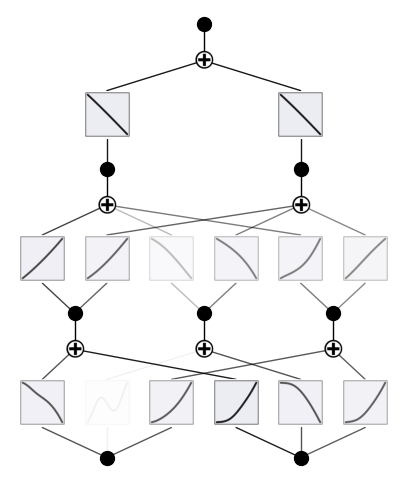

In [29]:
model(dataset['train_input'])
model.plot()

In [ ]:
model.fit(dataset, steps=500);

| train_loss: 3.90e-03 | test_loss: 4.95e-03 | reg: 3.79e+01 | : 100%|█| 500/500 [01:48<00:00,  4.61

saving model version 0.1


## KANs Implementation

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")

False
No GPU detected


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
import torch
import numpy as np
from kan import KAN
# Prepare the A_Z dataset for KAN
# The input shape for KAN is [batch_size, num_features].
# Our X_train and X_test are already flattened and scaled.
# Convert numpy arrays to tensors
dataset_kan = {
    'train_input': torch.from_numpy(X_train.reshape(X_train.shape[0], -1)),
    'test_input': torch.from_numpy(X_test.reshape(X_test.shape[0], -1)),
    'train_label': torch.from_numpy(y_train.astype(np.float32)),
    'test_label': torch.from_numpy(y_test.astype(np.float32))
}

# KAN model with appropriate input and output dimensions
# Input dimension is 784 (28*28)
# Output dimension is 26 (number of classes)

kan = KAN(width=[784, 32, 26])

kan = kan.to(device)  # <— move model to GPU if available

#
# kan(dataset_kan['train_input']);
# kan.plot()

checkpoint directory created: ./model
saving model version 0.0


In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

# Dataset + DataLoader
train_dataset = TensorDataset(dataset_kan['train_input'], dataset_kan['train_label'])
test_dataset = TensorDataset(dataset_kan['test_input'], dataset_kan['test_label'])
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model & Optimizer
kan = KAN(width=[784, 32, 26]).to(device)
optimizer = torch.optim.Adam(kan.parameters(), lr=1e-3)

# Training loop
for epoch in range(10):
    kan.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = kan(X_batch)
        loss = F.cross_entropy(outputs, y_batch.long())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss = {total_loss/len(train_loader):.4f}")

# Testing
kan.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        preds = torch.argmax(kan(X_batch), dim=1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)
print(f"Accuracy: {100 * correct / total:.2f}%")


In [ ]:
batch_size = 256
for i in range(0, len(dataset_kan['train_input']), batch_size):
    batch_x = dataset_kan['train_input'][i:i+batch_size]
    batch_y = dataset_kan['train_label'][i:i+batch_size]
    output = kan(batch_x)

KeyboardInterrupt: 

In [ ]:
# Train the KAN model on the A_Z dataset
kan.fit(dataset_kan, steps=100)

In [ ]:
kan = kan.prune()
kan.plot()